In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel(r'C:/TEMP/RECTUM - MET.S.xlsx')
data = data.dropna()

In [3]:
data.columns.get_loc("MET.S.BMI")

470

In [4]:
X = data.iloc[:,1:400].values 
y = data.iloc[:,470].values

In [5]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [8]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[12:52:33] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.500371


In [10]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:52:33] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:33] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:33] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0              0.5             0.0             0.5            0.0

In [12]:
print((cv_results["test-rmse-mean"]).tail(1))

0    0.5
Name: test-rmse-mean, dtype: float64


In [13]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[12:52:33] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/jed/Anaconda3/envs/keras/Library/bin/graphviz/'

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

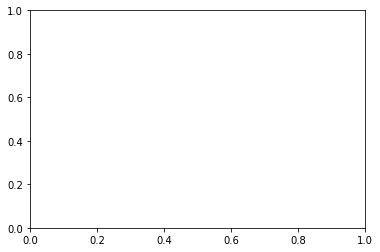

In [15]:
import graphviz 
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()


In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()